# Tutorial - Step1 : MTMR pretraining with Metric learning

## 1. Import requirements

In [1]:
import os
import sys
import pandas as pd
import torch
import time
import matplotlib.pyplot as plt

In [2]:
sys.path = [os.path.abspath(os.path.join(os.getcwd(), os.pardir))] + sys.path

In [3]:
from MTMR.dataset import TrainingSmilesDataset, ValidationSmilesDataset
from MTMR.vae import SmilesAutoencoder

## 2. Configure GPU (if available)

In [4]:
use_cuda = torch.cuda.is_available()
device = torch.device("cuda:0" if use_cuda else "cpu")
print(device)

cuda:0


## 3. Specify a target property

In [5]:
PROPERTY_NAME = "logp04"

## 4. Set directories (for inputs and outputs)

In [6]:
input_dir = os.path.abspath(os.path.join(os.pardir, "DATA", PROPERTY_NAME))

In [7]:
output_dir = f"outputs_4-1_{PROPERTY_NAME.upper()}_pretraining"
if not os.path.exists(output_dir):
    os.mkdir(output_dir)

## 5. Set file names

In [7]:
filepath_train = os.path.join(input_dir, "rdkit_train_triplet.txt")
filepath_valid = os.path.join(input_dir, "rdkit_valid.txt")

In [8]:
filepath_char2idx      = os.path.join(output_dir, "char2idx.csv")
filepath_configs       = os.path.join(output_dir, "configs.csv")
filepath_checkpoint    = os.path.join(output_dir, "checkpoints.pt")
filepath_history       = os.path.join(output_dir, "history.csv")
filepath_history_valid = os.path.join(output_dir, "history_valid.csv")

## 6. Load datasets (for training and validation)

In [9]:
dataset = TrainingSmilesDataset(filepath_train, device=device)
dataset.save_char2idx(filepath_char2idx)
dataset_valid = ValidationSmilesDataset(filepath_valid, filepath_char2idx, device=device)

## 7. Initialize a generator of MTMR

In [12]:
## Model configuration
model_configs = {"hidden_size":128,
                 "latent_size":128,
                 "num_layers" :2,
                 "vocab_size" :dataset.vocab_size,
                 "sos_idx"    :dataset.sos_idx,
                 "eos_idx"    :dataset.eos_idx,
                 "pad_idx"    :dataset.pad_idx,
                 "device"     :device
                }

## Model initialization
generator = SmilesAutoencoder(**model_configs)

## Configuration save
generator.save_config(filepath_configs)

## 8. Train

In [13]:
df_history, df_history_valid = generator.fit(dataset,
                                             validation_dataset=dataset_valid,
                                             total_steps=200000,
                                             checkpoint_filepath=filepath_checkpoint)

df_history.to_csv(filepath_history, index=False)
df_history_valid.to_csv(filepath_history_valid, index=False)

[00000000/00200000]  loss(tr): 3.405  loss_recon_src(tr): 3.404  loss_recon_tar(tr): 3.404  loss_recon_neg(tr): 3.406  loss_contractive(tr): 0.546  loss_margin(tr): 1.849  beta: 0.000  gamma: 0.000  valid_ratio(va): 0.120  similarity(va): 0.003
[00001000/00200000]  loss(tr): 0.666  loss_recon_src(tr): 0.681  loss_recon_tar(tr): 0.565  loss_recon_neg(tr): 0.658  loss_contractive(tr): 2.798  loss_margin(tr): 0.074  beta: 0.010  gamma: 0.010  valid_ratio(va): 0.915  similarity(va): 0.125
[00002000/00200000]  loss(tr): 0.561  loss_recon_src(tr): 0.556  loss_recon_tar(tr): 0.471  loss_recon_neg(tr): 0.530  loss_contractive(tr): 1.893  loss_margin(tr): 0.160  beta: 0.020  gamma: 0.020  valid_ratio(va): 0.940  similarity(va): 0.151
[00003000/00200000]  loss(tr): 0.500  loss_recon_src(tr): 0.484  loss_recon_tar(tr): 0.397  loss_recon_neg(tr): 0.449  loss_contractive(tr): 1.637  loss_margin(tr): 0.250  beta: 0.030  gamma: 0.030  valid_ratio(va): 0.935  similarity(va): 0.170
[00004000/00200000] 

[00034000/00200000]  loss(tr): 0.390  loss_recon_src(tr): 0.106  loss_recon_tar(tr): 0.090  loss_recon_neg(tr): 0.118  loss_contractive(tr): 0.534  loss_margin(tr): 0.299  beta: 0.340  gamma: 0.340  valid_ratio(va): 0.995  similarity(va): 0.423
[00035000/00200000]  loss(tr): 0.407  loss_recon_src(tr): 0.128  loss_recon_tar(tr): 0.083  loss_recon_neg(tr): 0.110  loss_contractive(tr): 0.554  loss_margin(tr): 0.301  beta: 0.350  gamma: 0.350  valid_ratio(va): 0.995  similarity(va): 0.407
[00036000/00200000]  loss(tr): 0.446  loss_recon_src(tr): 0.129  loss_recon_tar(tr): 0.077  loss_recon_neg(tr): 0.111  loss_contractive(tr): 0.541  loss_margin(tr): 0.403  beta: 0.360  gamma: 0.360  valid_ratio(va): 1.000  similarity(va): 0.418
[00037000/00200000]  loss(tr): 0.420  loss_recon_src(tr): 0.113  loss_recon_tar(tr): 0.080  loss_recon_neg(tr): 0.099  loss_contractive(tr): 0.655  loss_margin(tr): 0.217  beta: 0.370  gamma: 0.370  valid_ratio(va): 0.990  similarity(va): 0.407
[00038000/00200000] 

[00068000/00200000]  loss(tr): 0.615  loss_recon_src(tr): 0.082  loss_recon_tar(tr): 0.057  loss_recon_neg(tr): 0.089  loss_contractive(tr): 0.543  loss_margin(tr): 0.249  beta: 0.680  gamma: 0.680  valid_ratio(va): 0.990  similarity(va): 0.438
[00069000/00200000]  loss(tr): 0.647  loss_recon_src(tr): 0.079  loss_recon_tar(tr): 0.054  loss_recon_neg(tr): 0.110  loss_contractive(tr): 0.455  loss_margin(tr): 0.361  beta: 0.690  gamma: 0.690  valid_ratio(va): 0.980  similarity(va): 0.444
[00070000/00200000]  loss(tr): 0.572  loss_recon_src(tr): 0.075  loss_recon_tar(tr): 0.050  loss_recon_neg(tr): 0.088  loss_contractive(tr): 0.427  loss_margin(tr): 0.286  beta: 0.700  gamma: 0.700  valid_ratio(va): 1.000  similarity(va): 0.448
[00071000/00200000]  loss(tr): 0.618  loss_recon_src(tr): 0.076  loss_recon_tar(tr): 0.055  loss_recon_neg(tr): 0.087  loss_contractive(tr): 0.445  loss_margin(tr): 0.321  beta: 0.710  gamma: 0.710  valid_ratio(va): 0.995  similarity(va): 0.438
[00072000/00200000] 

[00102000/00200000]  loss(tr): 0.680  loss_recon_src(tr): 0.099  loss_recon_tar(tr): 0.066  loss_recon_neg(tr): 0.087  loss_contractive(tr): 0.323  loss_margin(tr): 0.272  beta: 1.000  gamma: 1.000  valid_ratio(va): 0.985  similarity(va): 0.413
[00103000/00200000]  loss(tr): 0.755  loss_recon_src(tr): 0.089  loss_recon_tar(tr): 0.075  loss_recon_neg(tr): 0.082  loss_contractive(tr): 0.445  loss_margin(tr): 0.229  beta: 1.000  gamma: 1.000  valid_ratio(va): 0.985  similarity(va): 0.419
[00104000/00200000]  loss(tr): 0.749  loss_recon_src(tr): 0.090  loss_recon_tar(tr): 0.068  loss_recon_neg(tr): 0.085  loss_contractive(tr): 0.428  loss_margin(tr): 0.240  beta: 1.000  gamma: 1.000  valid_ratio(va): 0.995  similarity(va): 0.411
[00105000/00200000]  loss(tr): 0.686  loss_recon_src(tr): 0.093  loss_recon_tar(tr): 0.072  loss_recon_neg(tr): 0.098  loss_contractive(tr): 0.430  loss_margin(tr): 0.168  beta: 1.000  gamma: 1.000  valid_ratio(va): 0.990  similarity(va): 0.444
[00106000/00200000] 

[00136000/00200000]  loss(tr): 0.533  loss_recon_src(tr): 0.120  loss_recon_tar(tr): 0.074  loss_recon_neg(tr): 0.096  loss_contractive(tr): 0.260  loss_margin(tr): 0.176  beta: 1.000  gamma: 1.000  valid_ratio(va): 1.000  similarity(va): 0.433
[00137000/00200000]  loss(tr): 0.646  loss_recon_src(tr): 0.105  loss_recon_tar(tr): 0.063  loss_recon_neg(tr): 0.079  loss_contractive(tr): 0.409  loss_margin(tr): 0.156  beta: 1.000  gamma: 1.000  valid_ratio(va): 1.000  similarity(va): 0.442
[00138000/00200000]  loss(tr): 0.603  loss_recon_src(tr): 0.081  loss_recon_tar(tr): 0.059  loss_recon_neg(tr): 0.082  loss_contractive(tr): 0.368  loss_margin(tr): 0.160  beta: 1.000  gamma: 1.000  valid_ratio(va): 0.995  similarity(va): 0.418
[00139000/00200000]  loss(tr): 0.709  loss_recon_src(tr): 0.097  loss_recon_tar(tr): 0.062  loss_recon_neg(tr): 0.101  loss_contractive(tr): 0.300  loss_margin(tr): 0.321  beta: 1.000  gamma: 1.000  valid_ratio(va): 1.000  similarity(va): 0.402
[00140000/00200000] 

[00170000/00200000]  loss(tr): 0.685  loss_recon_src(tr): 0.072  loss_recon_tar(tr): 0.055  loss_recon_neg(tr): 0.080  loss_contractive(tr): 0.346  loss_margin(tr): 0.269  beta: 1.000  gamma: 1.000  valid_ratio(va): 0.995  similarity(va): 0.421
[00171000/00200000]  loss(tr): 0.753  loss_recon_src(tr): 0.124  loss_recon_tar(tr): 0.087  loss_recon_neg(tr): 0.103  loss_contractive(tr): 0.345  loss_margin(tr): 0.304  beta: 1.000  gamma: 1.000  valid_ratio(va): 1.000  similarity(va): 0.437
[00172000/00200000]  loss(tr): 0.644  loss_recon_src(tr): 0.119  loss_recon_tar(tr): 0.084  loss_recon_neg(tr): 0.100  loss_contractive(tr): 0.327  loss_margin(tr): 0.216  beta: 1.000  gamma: 1.000  valid_ratio(va): 1.000  similarity(va): 0.428
[00173000/00200000]  loss(tr): 0.755  loss_recon_src(tr): 0.076  loss_recon_tar(tr): 0.051  loss_recon_neg(tr): 0.086  loss_contractive(tr): 0.431  loss_margin(tr): 0.252  beta: 1.000  gamma: 1.000  valid_ratio(va): 0.990  similarity(va): 0.410
[00174000/00200000] 

## 9. Visualize for loss analysis

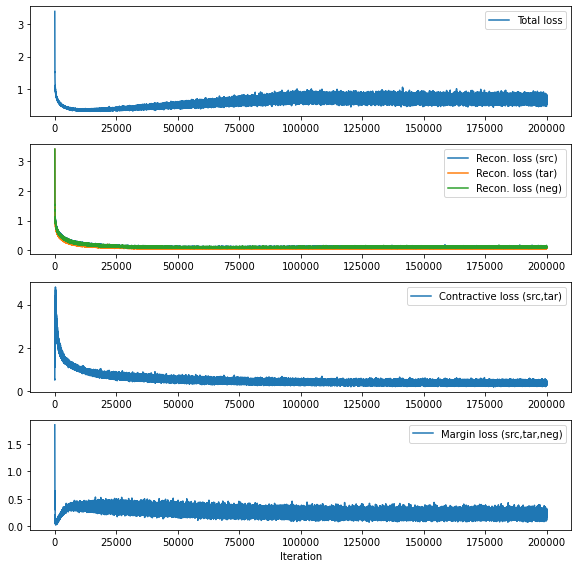

In [14]:
fig, axes = plt.subplots(4,1,figsize=(8,8))

axes[0].plot(df_history.loc[:,"LOSS_TOTAL"], label="Total loss")
axes[1].plot(df_history.loc[:,"LOSS_RECONSTRUCTION_SOURCE"], label="Recon. loss (src)")
axes[1].plot(df_history.loc[:,"LOSS_RECONSTRUCTION_TARGET"], label="Recon. loss (tar)")
axes[1].plot(df_history.loc[:,"LOSS_RECONSTRUCTION_NEGATIVE"], label="Recon. loss (neg)")
axes[2].plot(df_history.loc[:,"LOSS_CONTRACTIVE"], label="Contractive loss (src,tar)")
axes[3].plot(df_history.loc[:,"LOSS_MARGIN"], label="Margin loss (src,tar,neg)")

axes[3].set_xlabel("Iteration")
for ax in axes:
    ax.legend(loc='best')

plt.tight_layout()
plt.show()

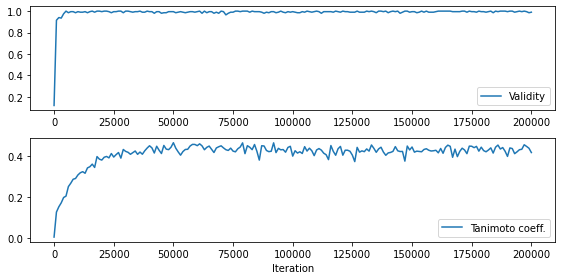

In [15]:
fig, axes = plt.subplots(2,1,figsize=(8,4))

axes[0].plot(df_history_valid.loc[:,"VALID_RATIO"], label="Validity")
axes[1].plot(df_history_valid.loc[:,"AVERAGE_SIMILARITY"], label="Tanimoto coeff.")

axes[1].set_xlabel("Iteration")
for ax in axes:
    ax.legend(loc='best')

plt.tight_layout()
plt.show()